# Chapter 5. Linear Transformations and Structure

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib widget
from sympy import Matrix
from pprint import pprint

## 41. Linear Transformations

A linear transformation is the heart of linear algebra. Rule that connects two vector spaces in a way that respects their linear structure.

### Definition

A function $T: V \rightarrow W$ between vector spaces is called a linear transformation if for all $u, v \in V$ and scalars $a,b \in \mathbb{R}$:

$$ T(au + bv) = aT(u) + bT(v) $$

The single condition encodes two rules:

1. additivity $\rightarrow T(u+v) = T(u) + T(v)$
2. homogeneity $\rightarrow T(av) = aT(v)$

If both of these are satisfied, then the transformation is linear. 

In [3]:
A = np.array([
    [2, 0],
    [0, 0.5]
])

v = np.array([1, 2])
Tv = A @ v
print("Original v:", v)
print("Transformed Tv:", Tv)

Original v: [1 2]
Transformed Tv: [2. 1.]


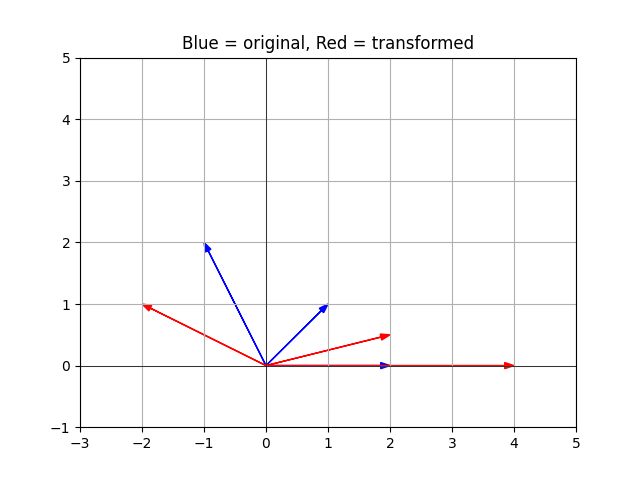

In [4]:
vectors = [np.array([1,1]), np.array([2,0]), np.array([-1,2])]

for v in vectors:
    Tv = A @ v
    plt.arrow(0,0,v[0],v[1],head_width=0.1,color='blue',length_includes_head=True)
    plt.arrow(0,0,Tv[0],Tv[1],head_width=0.1,color='red',length_includes_head=True)

plt.axhline(0,color='black',linewidth=0.5)
plt.axvline(0,color='black',linewidth=0.5)
plt.xlim(-3,5)
plt.ylim(-1,5)
plt.grid()
plt.title("Blue = original, Red = transformed")
plt.show()

In [5]:
theta = np.pi/2
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

v = np.array([1,0])
print("Rotate [1,0] by 90°:", R @ v)

Rotate [1,0] by 90°: [6.123234e-17 1.000000e+00]


In [6]:
u = np.array([1,2])
v = np.array([3,4])
c = 5

lhs = A @ (u+v)
rhs = A@u + A@v
print("Additivity holds?", np.allclose(lhs,rhs))

lhs = A @ (c*u)
rhs = c*(A@u)
print("Homogeneity holds?", np.allclose(lhs,rhs))

Additivity holds? True
Homogeneity holds? True


### Kernel and Image

For $T : V \rightarrow W$:
* the kernel (or null space) is all vectors mapped to zero: $\text{ker} T = \{ v \in V: T(v) = 0\}$
* the image (or range) is all outputs that can be achieved: $\text{im} T = \{ T(v) : v \in V \}
* the rank-nullity theoremm applies here:

$$ \text{dim} ( \text{ker } T) \ + \text{dim}(\text{im }T) = \text{dim}(V)$$

### Why It Matters

1. Linear transformations generalize matrices to any vector space
2. They unify geometry, algebra, and applications under one concept
3. They provide the natural framework for studying eigenvalues, eigenvectors, and decompositions
4. They model conutless real-world processes: physical, computational, and abstract

## 42. Matrix Representation of a Linear Map

Every linear transformation can be expressed concretely as a matrix. One of the most powerful bridges. Translates abstract functional rules into arrays of numbers that can be worked with. 

### From Abstract Rules to Concrete Numbers

Suppose $T : V \rightarrow W$ is a linear transformation between two finite-dimensionl vector spaces. To represent $T$ as a matrix, we first select bases:

* $B = \{ v_1, v_2, ..., v_n\}$ for the domain $V$
* $C = \{ w_1, w_2, ..., w_n\}$ for the codomain $W$

So then basically:

$$ [T]_{B \rightarrow C} = 
\begin{bmatrix}
a_{11} & a_{12} & ... & a_{1n} \\
a_{21} & a_{22} & ... & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & ... & a_{mn} 
\end{bmatrix}
$$

That's the matrix T relative to bases B and C. 

Guarantees that for any vec $x$ in coordinates relative to $B$, 
$$ [T(x)]_C = [T]_{B \rightarrow }[x]_B $$

In [7]:
e1 = Matrix([1,0])
e2 = Matrix([0,1])

def T(v):
    x, y = v
    return Matrix([2*x + y, x - y])

print("T(e1):", T(e1))
print("T(e2):", T(e2))

T(e1): Matrix([[2], [1]])
T(e2): Matrix([[1], [-1]])


Matrix in a different basis...

Let's suppose we use:

$$ B = \{ [1,1], [1,-1] \} $$

To represent $T$ in this basis:

1. Build the change-of-basis matrix $P$
2. Compute $A_B = P^{-1} AP$


In [11]:
A = Matrix.hstack(T(e1), T(e2))
print("Matrix representation in standard basis:\n", A)

Matrix representation in standard basis:
 Matrix([[2, 1], [1, -1]])


In [12]:
B = Matrix.hstack(Matrix([1,1]), Matrix([1,-1]))
P = B
A_B = P.inv() * A * P
print("Matrix representation in new basis:\n", A_B)

Matrix representation in new basis:
 Matrix([[3/2, 3/2], [3/2, -1/2]])


## 43. Kernel and Image

These are the DNA of a linear map, revealing its internal structure, its strengths, and its limitations. 

### Kernel

Kernel (or null space) of a linear xform is defined as:

$$ \text{ker}(T) = \{ v \in V : T(v) = 0 \} $$

* it's the set of all vectors that the xform sends to the zero vector
* measures how much info is lost under the xform
* kernel is always a subspace of the domain $V$

### Image

Image (or range) of a linear transformation is defined as:

$$ \text{im}(T) = \{ T(v) : v \in V \} $$

* it's the set of all vectors that can actually be reached by applying T
* it describes the output space of the xform
* the image is always a subspace of the codomain $W$

Again recall from the **Rank-Nullity Theorem**:

$$ \text{dim}(\text{ker} T) + \text{dim}(\text{im} T) = \text{dim} (V) $$

> This theorem guarantees a perfect balance: the domain splits into lost directions (kernel) and active directions (image).



In [13]:
A = Matrix([
    [1,2,3],
    [2,4,6]
])

print("Null space (kernel):", A.nullspace())

Null space (kernel): [Matrix([
[-2],
[ 1],
[ 0]]), Matrix([
[-3],
[ 0],
[ 1]])]


Image is also called the colspace programatically. So kernel == nullspace. Image == colspace. 

In [17]:
B = Matrix([
    [1,0,0],
    [0,1,0],
    [0,0,1]
])

print("Kernel of B:", B.nullspace())
print("Image of B:", B.columnspace())


Kernel of B: []
Image of B: [Matrix([
[1],
[0],
[0]]), Matrix([
[0],
[1],
[0]]), Matrix([
[0],
[0],
[1]])]


In [19]:
from sympy import Matrix

# Define the matrix
B = A = Matrix([
    [1,2,3],
    [2,4,6]
])

# Compute kernel (nullspace) and image (columnspace)
kernel = B.nullspace()
image = B.columnspace()

# Dimensions
nullity = len(kernel)
rank = len(image)
domain_dim = B.shape[1]

print("Matrix B:")
print(B)

print("\nNullspace basis (Kernel):", kernel)
print("Nullity (dim ker T):", nullity)

print("\nColumnspace basis (Image):", image)
print("Rank (dim im T):", rank)

# Verify Rank–Nullity Theorem
print(f"\nRank + Nullity = {rank} + {nullity} = {rank + nullity}")
print("Dimension of domain (dim V):", domain_dim)

if rank + nullity == domain_dim:
    print("\n✅ Rank–Nullity Theorem verified.")
else:
    print("\n❌ Theorem not satisfied (check your matrix).")


Matrix B:
Matrix([[1, 2, 3], [2, 4, 6]])

Nullspace basis (Kernel): [Matrix([
[-2],
[ 1],
[ 0]]), Matrix([
[-3],
[ 0],
[ 1]])]
Nullity (dim ker T): 2

Columnspace basis (Image): [Matrix([
[1],
[2]])]
Rank (dim im T): 1

Rank + Nullity = 1 + 2 = 3
Dimension of domain (dim V): 3

✅ Rank–Nullity Theorem verified.


## 44. Invertibility and Isomorphisms

Linear transformations come in many forms: some collapse space into lower dimensions, stretch it, and a special group preserves all information. 

### Inveritbility of Linear Transformations

**A linear transformation $T : V \rightarrow W$ is invertible if there exists another linear transformation $S : W \rightarrow W$ such that:**

$$ S \circ T = I_v \text{    and    } T \circ S = I_W$$

where $I_V$ and $I_W$ are identity maps on $V$ and $W$. 

* $S$ is called the inverse of $T$
* If such an inverse exists, $T$ is a bijections (both one-to-one (injective) and onto (surjective))

### Invertible Matrices

An $n \times n$ matrix $A$ is invertible if there exists another $n \times n$ matrix $A^{-1}$ such that:
$$ AA^{-1} = A^{-1}A = I $$

Characterizations of invertibility:

1. $A$ is invertible $\Leftrightarrow \det(A) \ne 0$.
2. $\Leftrightarrow$ Columns of $A$ are linearly independent.
3. $\Leftrightarrow$ Columns of $A$ span $\mathbb{R}^n$.
4. $\Leftrightarrow$ Rank of $A$ is $n$.
5. $\Leftrightarrow$ The system $A x = b$ has exactly one solution for every $b$.

### Isomorphisms of Vector Spaces

Two vector spaces $V$ and $W$ are isomorphic if there exists a bijective linear transformation $T : V \rightarrow W$.

* this means $V$ and $W$ are in "the same" structure
* for example $\mathbb{R}^2$ and then set of all polynomials of degree $\leq 1$ are isomoprhic

In [20]:
A = Matrix([
    [2,1],
    [5,3]
])

print("Determinant:", A.det())
print("Is invertible?", A.det() != 0)

Determinant: 1
Is invertible? True


In [21]:
A_inv = A.inv()
print("Inverse matrix:\n", A_inv)

print("Check A*A_inv = I:\n", A * A_inv)

Inverse matrix:
 Matrix([[3, -1], [-5, 2]])
Check A*A_inv = I:
 Matrix([[1, 0], [0, 1]])


In [22]:
A = np.array([[2,1],[5,3]], dtype=float)
print("Determinant:", np.linalg.det(A))
print("Inverse:\n", np.linalg.inv(A))

Determinant: 1.0000000000000002
Inverse:
 [[ 3. -1.]
 [-5.  2.]]


## 45. Composition, Powers, and Iteration

Linear xforms are not isolated operations - they can be combined, repeated, and layered to build more complex effects. 

I'm going to skim this section, but basically if we have two linear xforms, then their composition is another valid linear xform. 

### Powers of Transformations

If $T : V \rightarrow V$, we can apply it repeatedly:

$$ T^2 = T \circ T, T^3 = T \circ T \circ T, ... $$

Powers of xformations capture repeated processes, like compounding interest, pop grwoth, iterative algos etc. 

### Iteration and Dynamical Systems

$$ x_{k+1} = T(x_k), x_0 \text{ given}$$

Many examples:

1. markov chains - iteration descibres probability evolution over time, should converge to steady state distribution
2. population models - iteration simulates generation
3. computer graphics - repeated affine transformations create fractals

### Stability and Eigenvalues

The behavior of $T^n(x)$ depends heavily on eigenvalues of the transformation. 

* If $|\lambda|$ < 1 , repeated application shrinks vectors
* If $|\lambda|$ > 1 , repeated application causes exponential growth
* If $|\lambda|$ = 1 , vectors rotate or oscillate without changing length



In [23]:
theta = np.pi/2
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])
S = np.array([
    [2,0],
    [0,1]
])

# Compose: apply R then S
C = S @ R
print("Composite matrix:\n", C)

Composite matrix:
 [[ 1.2246468e-16 -2.0000000e+00]
 [ 1.0000000e+00  6.1232340e-17]]


In [24]:
v = np.array([1,1])
step1 = R @ v
step2 = S @ step1
composite = C @ v

print("Step-by-step:", step2)
print("Composite:", composite)

Step-by-step: [-2.  1.]
Composite: [-2.  1.]


In [25]:
A = np.array([[2,0],[0,2]])
v = np.array([1,1])

print("A @ v =", A @ v)
print("A^2 @ v =", np.linalg.matrix_power(A,2) @ v)
print("A^5 @ v =", np.linalg.matrix_power(A,5) @ v)

A @ v = [2 2]
A^2 @ v = [4 4]
A^5 @ v = [32 32]


In [26]:
A = np.array([[0.5,0],[0,0.5]])
v = np.array([4,4])

for i in range(5):
    v = A @ v
    print(f"Step {i+1}:", v)

Step 1: [2. 2.]
Step 2: [1. 1.]
Step 3: [0.5 0.5]
Step 4: [0.25 0.25]
Step 5: [0.125 0.125]


In [27]:
np.random.seed(0)
M = np.random.randint(-2,3,(2,2))
print("Random matrix:\n", M)

print("M^2:\n", np.linalg.matrix_power(M,2))
print("M^3:\n", np.linalg.matrix_power(M,3))

Random matrix:
 [[ 2 -2]
 [ 1  1]]
M^2:
 [[ 2 -6]
 [ 3 -1]]
M^3:
 [[ -2 -10]
 [  5  -7]]


## 46. Similarity and Conjugation

Two matrices are similar if one is obtained from the other by a conjugatino with an invertible change-of-basis matrix. This concept is central to understanding canoncial forms, egenvalue decompositions, and the deep structure of linear operators. 

### Definition of Similarity 

Two $n \times n$ matrices are called similar if there exists an invertible matrix $P$ such that:

$$ B = P^{-1} A P $$

### Properties Preserved Under Similarity 

If $A$ and $B$ are similar, they share many key properties:

1. $det(A) = det(B)$
2. $tr(A) = tr(B)$
3. $rank(A) = rank(B)$
4. eigenvalues (same set with multiplicity)
5. characteristic polynomail - identical
6. minimal polynomial - identical

## 47. Projections and Reflections

Projections and reflections are key transformations.

### Projection: Flattening onto a Subspace

For a general subspace with orthonormal basis columns in matrix $Q$:
$$ P = Q Q^T $$
projects any vector onto that subspace. 

Properties:
1. $P^2 = P$ idempotent
2. $P^T = P$ symmetric

### Reflection: Flipping across a Subspace

Matrix form:
$$ R(v) = 2\text{proj}_{u} (v) - v $$

## 48. Rotations and Shear

Skipping but feel free to reference back:
* book - https://little-book-of.github.io/linear-algebra/books/en-US/book.html#rotations-and-shear
* lab - https://little-book-of.github.io/linear-algebra/books/en-US/lab.html#rotations-and-shear-geometric-intuition

In [28]:
def rotation_matrix(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

theta = np.pi/4   # 45 degrees
R = rotation_matrix(theta)

v = np.array([2,1])
rotated_v = R @ v
print("Original v:", v)
print("Rotated v (45°):", rotated_v)

Original v: [2 1]
Rotated v (45°): [0.70710678 2.12132034]


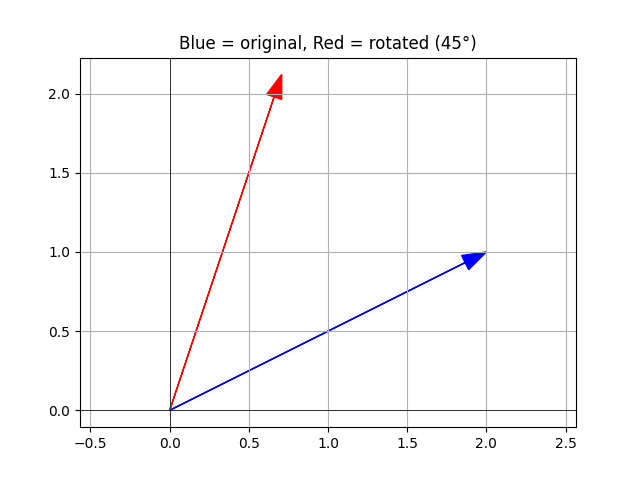

In [30]:
plt.cla()
plt.arrow(0,0,v[0],v[1],head_width=0.1,color="blue",length_includes_head=True)
plt.arrow(0,0,rotated_v[0],rotated_v[1],head_width=0.1,color="red",length_includes_head=True)

plt.axhline(0,color='black',linewidth=0.5)
plt.axvline(0,color='black',linewidth=0.5)
plt.grid()
plt.title("Blue = original, Red = rotated (45°)")
plt.axis("equal")
plt.show()

In [31]:
# shear
k = 1.0
S = np.array([
    [1,k],
    [0,1]
])

sheared_v = S @ v
print("Sheared v:", sheared_v)

Sheared v: [3. 1.]


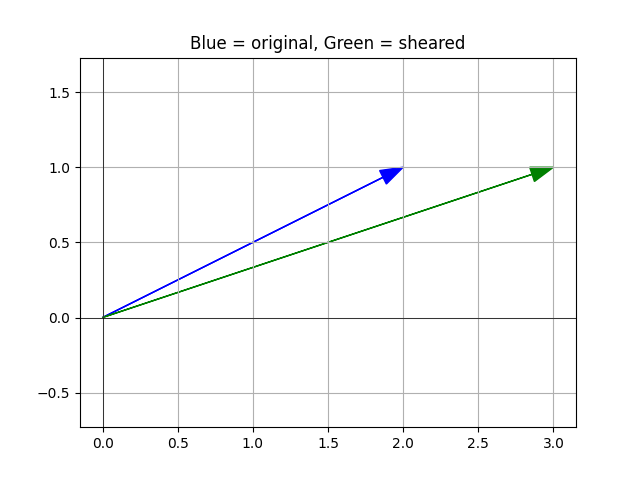

In [33]:
plt.cla()
plt.arrow(0,0,v[0],v[1],head_width=0.1,color="blue",length_includes_head=True)
plt.arrow(0,0,sheared_v[0],sheared_v[1],head_width=0.1,color="green",length_includes_head=True)

plt.axhline(0,color='black',linewidth=0.5)
plt.axvline(0,color='black',linewidth=0.5)
plt.grid()
plt.title("Blue = original, Green = sheared")
plt.axis("equal")
plt.show()

# shear preserves area (det = 1)


## 49. Rank and Operator Viewpoint

Again, rank captures how many independent directions a xform preserves. 

### Definition of Rank

For matrix $A$ representing a linear transform: $T : V \rightarrow W$:
$$ \text{rank}(A) = \text{dim(im(A))} = \text{dim(im(T))}$$


The rank is the dimension of the image (or colspace). It counts the max number of linearly independent columns. 

### Rank and Matrix Factorizations

1. LU factorizations: rank determines nuber of non-zero pivots
2. QR factorizations: rank controls the number of orthogonal directions
3. SVD: number of nonzero singular values equals the rank

### Rank in Applications

1. Data compression - low rank approximations reduce storage (image compression with SVD)
2. stats - rank of the design matrix determines identifiability of regression coeffecients 
3. machine learning - rank of weight matrices controls expressive power of models
4. control theory - rank conditions ensure controllability and observability of systmes
5. network analysis - rank of adjacency or laplacian matrices reflects connectivity

## 50. Block Matrices and Block Maps

It's powerful to organize matrices into blocks - submatrices grouped together like tiles in a mosaic. 

### What are Block Matrices? 

Block matrix partitions matrix into regular submatrices. Each block is itself a matrix and we can manipulate everything using block rules.

### Block Maps as Linear Transformations

Suppose $ V = V_1 \oplus V_2 $ is decomposed into two subspaces. A linear map $T : V \rightarrow V$ can be described in terms of how it acts on each component. 

### Block Matrix Inverses

Some can be inverted using special formulas. For:

$$ M = \begin{bmatrix} A & B \\ C & D \end{bmatrix} $$

if $A$ is invertible, the inverse can be expressed using the **Schur** complement:

$$ 
M^{-1} = 
\begin{bmatrix}
A^{-1} + A^{-1} B(D-CA^{-1}B)^{-1}CA^{-1} & -A^{-1}B(D-CA^{-1}B)^{-1} \\
-(D-CA^{-1}B)^{-1}CA^{-1} & (D-CA^{-1}B)^{-1}
\end{bmatrix}
$$

### Why It Matters

1. Block matrices turn big problems into manageable smaller ones
2. Reflect nature decompositions
3. Make explicit geometry of subspace interactions
4. Efficient algos for large-scale computing

In [38]:
A11 = Matrix([[1,2],[3,4]])
A12 = Matrix([[5,6],[7,8]])
A21 = Matrix([[9,10]])
A22 = Matrix([[11,12]])

# Combine into a block matrix
A = Matrix.vstack(
    Matrix.hstack(A11, A12),
    Matrix.hstack(A21, A22)
)

print('A11')
pprint(A11)
print('A12')
pprint(A12)
print('A21')
pprint(A21)
print('A22')
pprint(A22)
print("Block matrix A:")
pprint(A)

A11
Matrix([
[1, 2],
[3, 4]])
A12
Matrix([
[5, 6],
[7, 8]])
A21
Matrix([[9, 10]])
A22
Matrix([[11, 12]])
Block matrix A:
Matrix([
[1,  2,  5,  6],
[3,  4,  7,  8],
[9, 10, 11, 12]])


In [39]:
A = Matrix([
    [1,2,5,6],
    [3,4,7,8],
    [9,10,11,12]
])

x = Matrix([1,1,2,2])
print("A * x =", A*x)


A * x = Matrix([[25], [37], [65]])
